What is the relationship between an Index and a stock in the Index? What is the characteristic of the stock and the Index? Should, we invest in the stock or the Index?

To Answer the below question i have used (https://www.bseindia.com/)
<BR>
BSE 150 Midcap Index data(Top Gainer and losser) - https://www.bseindia.com/sensex/code/102
<BR>
BSE 1 Year data - https://www.bseindia.com/indices/IndexArchiveData.html
<BR>
Deepak Nitrite 1 Year data - https://www.bseindia.com/markets/equity/EQReports/StockPrcHistori.html?flag=0

In [78]:
# Getting the top Gainers and Lossers of the Index

import pandas as pd
import numpy as np
from scipy.stats import describe
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import ttest_1samp
import matplotlib.pyplot as plt


# Load the CSV file
df = pd.read_csv(r"BSEmidcapdata.csv")

# Strip leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Rename the columns 
df = df.rename(columns={
    'LTP': 'Last_Traded_Price', 
    'Company': 'Company_Name',
    'Percentagechange0': 'Percentage_Change'
})

# Convert relevant columns to lists
amount_list1 = df['Company_Name'].tolist()
amount_list2 = df['Last_Traded_Price'].tolist()  
amount_list = df['Percentage_Change'].tolist()  


# Create a DataFrame using the selected data
D = pd.DataFrame({
    'Company_Name': amount_list1,
    'Last_Traded_Price': amount_list2,
    'Percentage_Change': df['Percentage_Change']  
})

#print(D)

# Select the top 6 rows based on 'Percentage_Change'
Gainers = D.nlargest(10, 'Percentage_Change')  
#Gainer_excluding_index = Gainers.iloc[1:6] 
#print("Top Gainers Excluding First Index:")
print("\nGainers:")
print(Gainers)

# Sort the DataFrame 'D' by 'Percentage_Change' in ascending order (smallest changes first)
D_sorted_losers = D.sort_values(by='Percentage_Change', ascending=True)

# Select the bottom 5 rows from the sorted data
Losser = D_sorted_losers.head(10) 

# Print the bottom 10 losers (sorted in ascending order)
print("\nLosers:")
print(Losser)


Gainers:
   Company_Name  Last_Traded_Price  Percentage_Change
1       COFORGE            7558.45              11.23
0    PERSISTENT            5717.70              10.89
2          MFSL            1273.70               8.83
3         PAYTM             745.00               8.40
46         MRPL             155.00               5.30
5       MPHASIS            3120.10               4.83
11   BANDHANBNK             182.25               4.80
19    NAM-INDIA             690.00               4.40
4       TIINDIA            4646.60               3.65
16    DEEPAKNTR            2733.80               3.15

Losers:
    Company_Name  Last_Traded_Price  Percentage_Change
146   FLUOROCHEM            4386.85              -6.94
138       M&MFIN             267.85              -4.87
143         BHEL             223.65              -3.97
145        ALKEM            5861.70              -3.94
149   CUMMINSIND            3414.55              -3.58
140     KPITTECH            1632.25              -3.43
13

In the above code we ranked the top gainer and losser of the an Index based on the returns generated.

In [79]:
# Load the data from CSV
B = pd.read_csv("BSE1yeardata.csv")

# Calculate the daily percentage change based on closing prices
B['Percentage_Change_BSE'] = B['Close'].pct_change() * 100  

# Statistical Analysis
print('Statistical Analysis of BSE 150 Midcap:')
print('Number of observations:', len(B['Percentage_Change_BSE']))
print('Min and max pair (tuple):', round(B['Percentage_Change_BSE'].min(),2), round(B['Percentage_Change_BSE'].max(),2))
print('Mean:', round(B['Percentage_Change_BSE'].mean(), 2))
print('Variance:', round(B['Percentage_Change_BSE'].var(), 2))
print('Skewness:', round(B['Percentage_Change_BSE'].skew(), 2))
print('Kurtosis:', round(B['Percentage_Change_BSE'].kurtosis(), 2))

#The statistical description of returns of Deepak Nitret
# Load the data from CSV
D = pd.read_csv("Deepaknitret.csv")

# Calculate the daily percentage change based on closing prices
D['Percentage_Change_Deepak'] = D['Close Price'].pct_change() * 100 

# Statistical Analysis
print()
print('Statistical Analysis of Deepak Nitret:')
print('Number of observations:', len(D['Percentage_Change_Deepak']))
print('Min and max pair (tuple):', (round(D['Percentage_Change_Deepak'].min(), 2), round(D['Percentage_Change_Deepak'].max(), 2)))
print('Mean:', round(D['Percentage_Change_Deepak'].mean(), 2))
print('Variance:', round(D['Percentage_Change_Deepak'].var(), 2))
print('Skewness:', round(D['Percentage_Change_Deepak'].skew(), 2))
print('Kurtosis:', round(D['Percentage_Change_Deepak'].kurtosis(), 2))

Statistical Analysis of BSE 150 Midcap:
Number of observations: 248
Min and max pair (tuple): -9.02 17.11
Mean: 0.18
Variance: 2.63
Skewness: 3.25
Kurtosis: 53.8

Statistical Analysis of Deepak Nitret:
Number of observations: 248
Min and max pair (tuple): (-5.59, 5.73)
Mean: 0.14
Variance: 3.24
Skewness: 0.03
Kurtosis: 0.84


The statistical analysis of the BSE 150 Midcap Index and Deepak Nitrite’s daily returns highlights contrasting profiles. The BSE 150 Midcap Index shows significant volatility, with returns ranging from -9.02% to 17.11%, a mean of 0.18%, and a variance of 2.63. A high skewness of 3.25 and a kurtosis of 53.8 indicate a right-skewed, “fat-tailed” distribution, suggesting a propensity for extreme price movements. These characteristics imply that while the index offers growth potential, it also entails considerable risk, making it suitable for investors who are prepared for substantial fluctuations.

Conversely, Deepak Nitrite demonstrates a more stable performance, with returns ranging between -5.59% and 5.73%, a mean of 0.14%, and a variance of 3.24. Its near-zero skewness (0.03) and low kurtosis (0.84) reflect a symmetrical, thin-tailed distribution, suggesting minimal risk of sudden, sharp price changes. This stability makes Deepak Nitrite an attractive option for conservative investors seeking consistent returns. Together, these assets could balance a portfolio, blending the midcap index’s growth potential with Deepak Nitrite’s stability to create a mix of moderate risk and reliable performance.

In [80]:
# Calculate the daily percentage change for both datasets based on closing prices
B['Percentage_Change_BSE'] = B['Close'].pct_change() * 100  
D['Percentage_Change_Deepak'] = D['Close Price'].pct_change() * 100 

# Merge the two datasets on the 'Date' column to align dates
merged_data = pd.merge(B[['Date', 'Percentage_Change_BSE']], D[['Date', 'Percentage_Change_Deepak']], on='Date')

# Assign 1 for increase (positive change), 0 for decrease/no change
merged_data['bse_up'] = np.where(merged_data['Percentage_Change_BSE'] > 0, 1, 0)
merged_data['deepak_up'] = np.where(merged_data['Percentage_Change_Deepak'] > 0, 1, 0)

# Recursive function to count days when both are up
def count_both_up_days(data, index=0, count=0, dates=[]):
    """Recursively counts the days where both columns show an increase."""
    if index >= len(data):
        return count, dates
    if data.loc[index, 'bse_up'] == 1 and data.loc[index, 'deepak_up'] == 1:
        count += 1
        dates.append(data.loc[index, 'Date'])
    return count_both_up_days(data, index + 1, count, dates)

# Call the recursive function
both_up_count, both_up_dates = count_both_up_days(merged_data)

# Display results
print(f"Number of days when both BSE Midcap and Deepak Nitrite went up: {both_up_count}")
print("\n Dates when both went up: \n", both_up_dates)

Number of days when both BSE Midcap and Deepak Nitrite went up: 105

 Dates when both went up: 
 ['06-Oct-23', '10-Oct-23', '11-Oct-23', '16-Oct-23', '17-Oct-23', '27-Oct-23', '30-Oct-23', '02-Nov-23', '03-Nov-23', '06-Nov-23', '08-Nov-23', '10-Nov-23', '12-Nov-23', '15-Nov-23', '16-Nov-23', '21-Nov-23', '23-Nov-23', '29-Nov-23', '01-Dec-23', '05-Dec-23', '06-Dec-23', '07-Dec-23', '11-Dec-23', '13-Dec-23', '14-Dec-23', '15-Dec-23', '18-Dec-23', '21-Dec-23', '22-Dec-23', '26-Dec-23', '29-Dec-23', '03-Jan-24', '04-Jan-24', '09-Jan-24', '11-Jan-24', '19-Jan-24', '24-Jan-24', '29-Jan-24', '31-Jan-24', '06-Feb-24', '13-Feb-24', '14-Feb-24', '15-Feb-24', '16-Feb-24', '22-Feb-24', '29-Feb-24', '01-Mar-24', '07-Mar-24', '14-Mar-24', '21-Mar-24', '22-Mar-24', '27-Mar-24', '01-Apr-24', '02-Apr-24', '05-Apr-24', '10-Apr-24', '22-Apr-24', '23-Apr-24', '24-Apr-24', '25-Apr-24', '26-Apr-24', '02-May-24', '10-May-24', '16-May-24', '17-May-24', '18-May-24', '24-May-24', '31-May-24', '03-Jun-24', '05-J

The data indicates that both the index and the stock experienced increases 105 times over the course of 248 trading days in a year. This suggests a strong correlation between the index and the stock, as the index tends to rise simultaneously with the stock. Now, let’s analyze the prices of the index and the stock to examine their distribution.

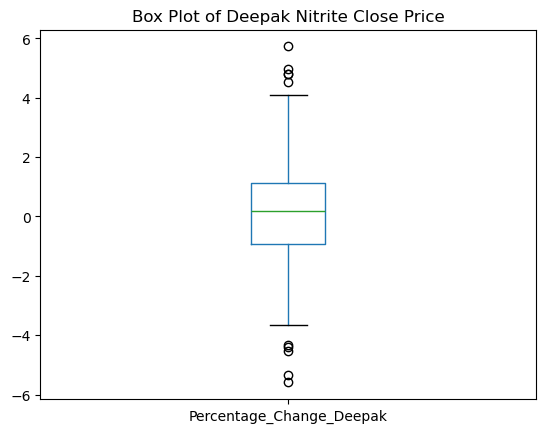

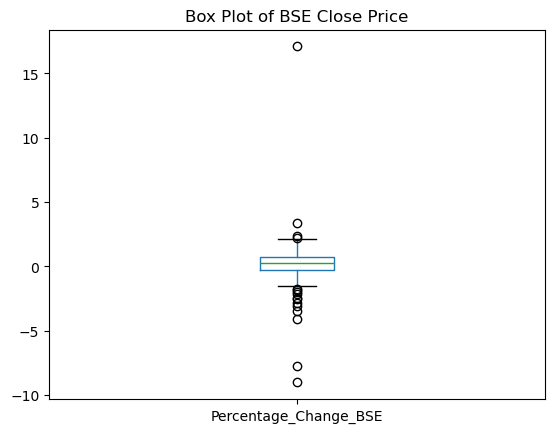

In [81]:
# Box Plot
# Load the Deepak Nitrite data
D = pd.read_csv("Deepaknitret.csv")
D['Percentage_Change_Deepak'] = D['Close Price'].pct_change() * 100 
# Create a box plot for Deepak Nitrite's closing prices
D.boxplot(column=['Percentage_Change_Deepak'], grid=False)
plt.title('Box Plot of Deepak Nitrite Close Price')
plt.show()

# Load the BSE data
B = pd.read_csv("BSE1yeardata.csv")
B['Percentage_Change_BSE'] = B['Close'].pct_change() * 100 
# Create a box plot for BSE's closing prices
B.boxplot(column=['Percentage_Change_BSE'], grid=False)
plt.title('Box Plot of BSE Close Price')
plt.show()

The box plots above, displaying the percentage change in price, highlight the data spread and identify extreme outliers. Both plots are moderately skewed. The interquartile range (IQR) for the BSE Index is smaller than that of Deepak Nitrite, indicating less variability among its central data points. Deepak Nitrite's whiskers extend further in both directions, while the BSE Index has shorter whiskers but contains more outliers. This suggests that the BSE Index exhibits more unusual data points and greater variability in the dataset than Deepak Nitrite.

/tmp/ipykernel_417/85775520.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  B['Date'] = pd.to_datetime(B['Date'])
/tmp/ipykernel_417/85775520.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  D['Date'] = pd.to_datetime(D['Date'])


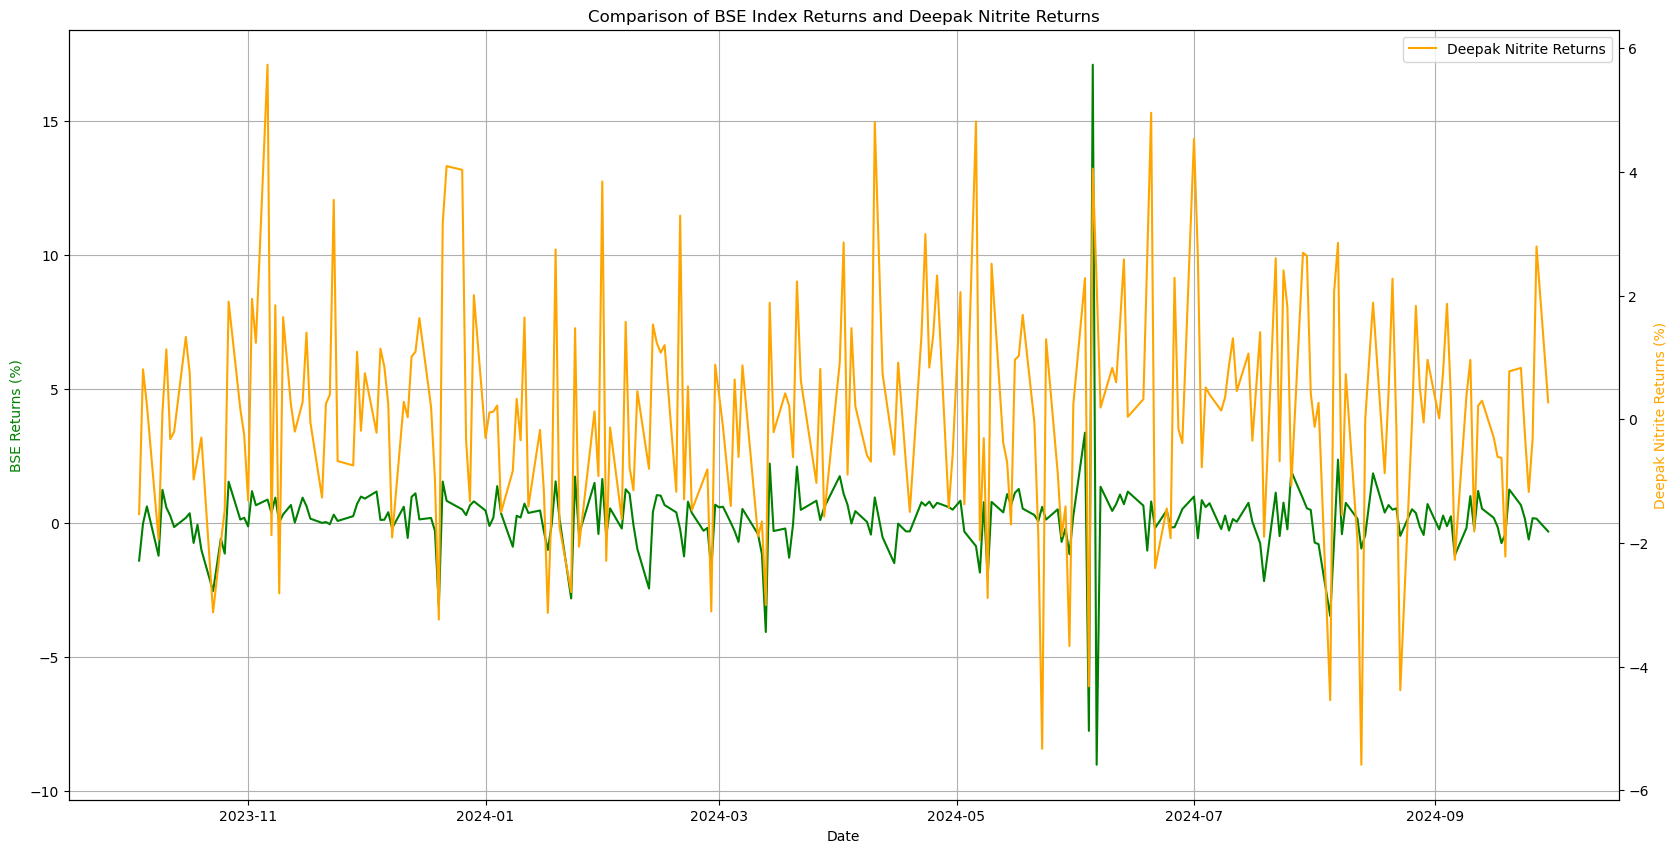

In [82]:
# Extract the returns data
bse_returns = B['Percentage_Change_BSE'] 
deepak_returns = D['Percentage_Change_Deepak'] 

# Create a date index if necessary (optional, if you have date columns in your data)
# Assuming there's a 'Date' column in your CSVs
B['Date'] = pd.to_datetime(B['Date']) 
D['Date'] = pd.to_datetime(D['Date']) 

# Plotting the line graph
plt.figure(figsize=(20, 10))

# Create the first plot for BSE Returns
plt.plot(B['Date'], bse_returns, label='BSE Index Returns', color='Green')
plt.xlabel('Date')
plt.ylabel('BSE Returns (%)', color='Green')
plt.title('Comparison of BSE Index Returns and Deepak Nitrite Returns')
plt.grid(True)

# Create a second y-axis for Deepak Nitrite Returns
ax2 = plt.gca().twinx()  # Get current axes and create a twin axis
ax2.plot(D['Date'], deepak_returns, label='Deepak Nitrite Returns', color='orange')
ax2.set_ylabel('Deepak Nitrite Returns (%)', color='orange') 

# Add legends for both plots
plt.legend(loc='upper left') 
ax2.legend(loc='upper right') 

# Display the plot
plt.show()

The index returns exhibited extreme volatility during June, particularly around the dates of the elections in India. Outside of this period, the index returns remained relatively stable, fluctuating between 4% and -3%. In contrast, during the same timeframe, Deepak Nitrite’s returns did not experience significant movement, remaining within a range of -5% to 5%. This indicates that Deepak Nitrite is less volatile compared to the index. Therefore, it suggests that other stocks may play a more significant role in driving the major movements of the index, rather than Deepak Nitrite.


Here we can conclude that Deepak Nitret is less volitile and less risky as compared to BSE index, so investing in Deepak Nitret rather than the entire Index is more advisable.

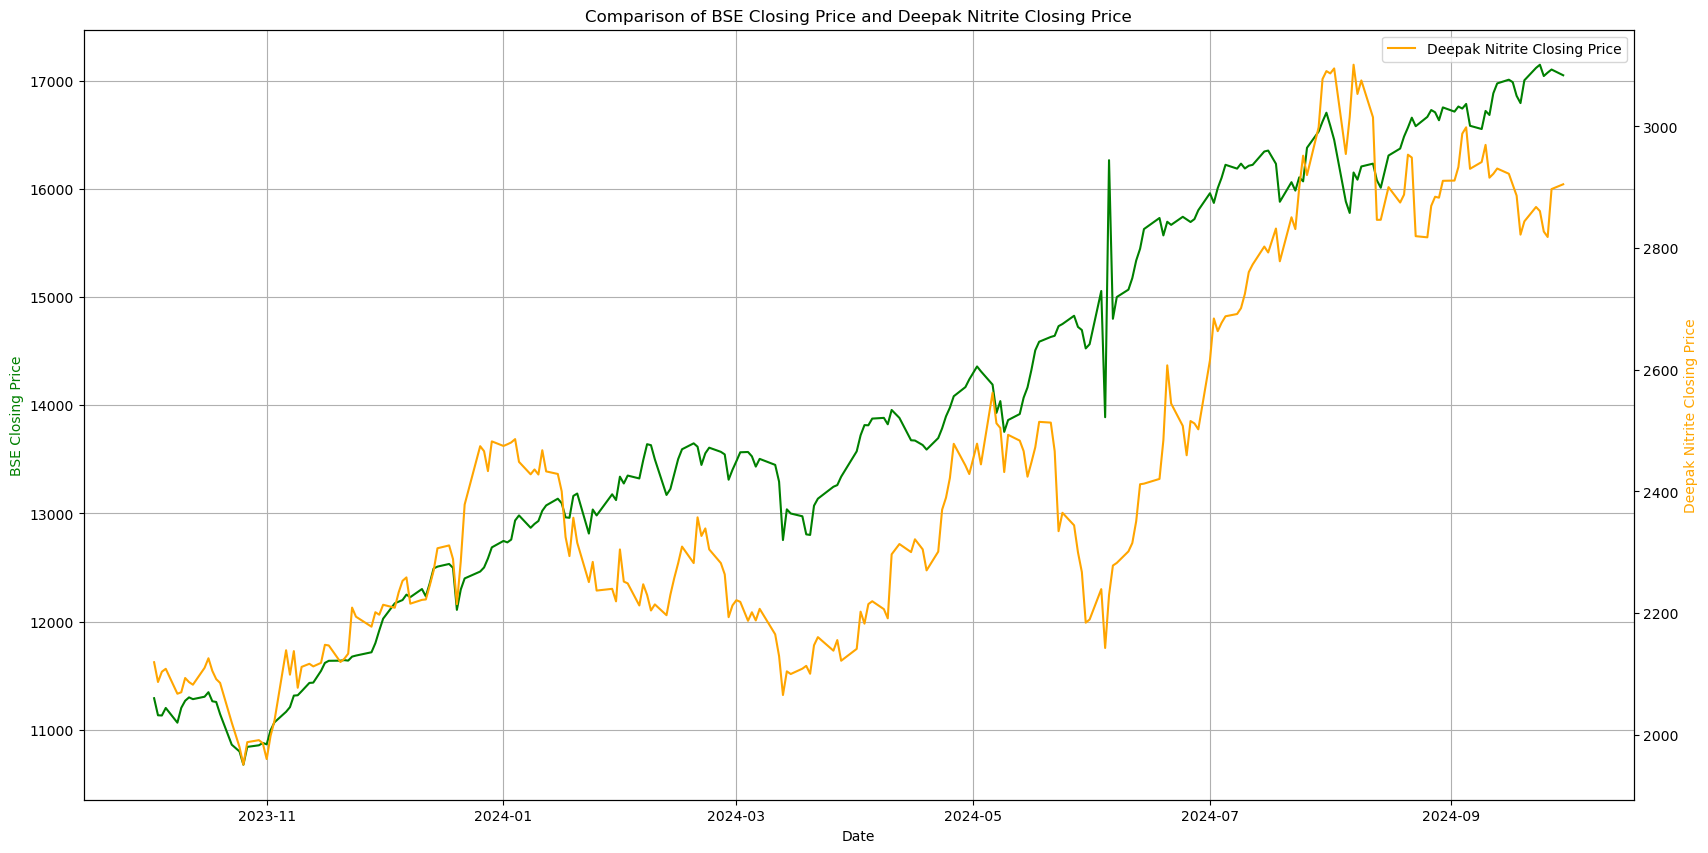

In [83]:
# Plotting the line graph
plt.figure(figsize=(20, 10))

# Create the first plot for BSE Closing Price
plt.plot(B['Date'], B['Close'], label='BSE Closing Price', color='green')
plt.xlabel('Date')
plt.ylabel('BSE Closing Price', color='green')
plt.title('Comparison of BSE Closing Price and Deepak Nitrite Closing Price')
plt.grid(True)

# Create a second y-axis for Deepak Nitrite Closing Price
ax2 = plt.gca().twinx()  # Get current axes and create a twin axis
ax2.plot(D['Date'], D['Close Price'], label='Deepak Nitrite Closing Price', color='orange')
ax2.set_ylabel('Deepak Nitrite Closing Price', color='orange')  # Label for the second y-axis

# Add legends for both plots
plt.legend(loc='upper left') 
ax2.legend(loc='upper right') 

# Display the plot
plt.show()


The graph offers a visual comparison of the slopes for both the index and the stock. Both the stock and the index exhibit upward-trending curves, with the index showcasing a more pronounced exponential growth. In contrast, Deepak Nitrite follows a head and shoulders pattern. It is only after the elections that Deepak Nitrite begins to gain traction and synchronizes its trend with that of the index.

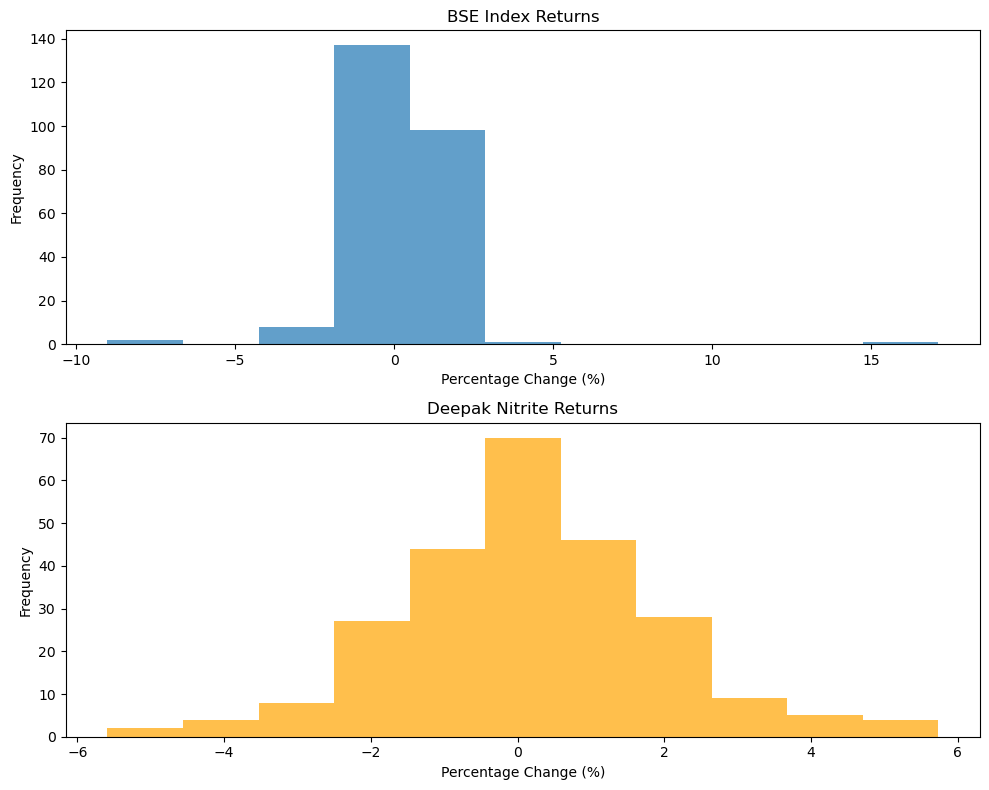

In [84]:
bse_returns = B['Percentage_Change_BSE'] 
deepak_returns = D['Percentage_Change_Deepak'] 

# Plot histograms for both BSE and Deepak Nitrite returns
plt.figure(figsize=(10, 8))

# Histogram for BSE Index returns
plt.subplot(2, 1, 1)  # row 2, col 1, index 1
plt.hist(bse_returns, bins=11, alpha=0.7)  
plt.title('BSE Index Returns')
plt.xlabel('Percentage Change (%)')
plt.ylabel('Frequency')

# Histogram for Deepak Nitrite returns
plt.subplot(2, 1, 2)  # row 2, col 1, index 2
plt.hist(deepak_returns, bins=11, color='orange', alpha=0.7)  
plt.title('Deepak Nitrite Returns')
plt.xlabel('Percentage Change (%)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


The histogram illustrates the presence of extreme outliers in the BSE Index, revealing a distribution with heavy tails and a pronounced right skew, indicating a higher frequency of extreme positive returns. This is confirmed by the descriptive analysis, which reports a kurtosis of 53, highlighting the substantial "fat tails" in the distribution.

In contrast, he histogram  of Deepak Nitrite is more symmetrical compared to the index, with less pronounced heavy tails. This characteristic implies that Deepak Nitrite is comparatively less risky, as heavy tails are associated with greater potential for extreme movements and higher volatility. Consequently, the risk profile of Deepak Nitrite is more stable than that of the index.

In [85]:
# Combine relevant columns into a new DataFrame for correlation analysis
combined_data = pd.DataFrame({
    'BSE_Percentage_Change': B['Percentage_Change_BSE'],
    'Deepak_Nitrite_Percentage_Change': D['Percentage_Change_Deepak']
})

# Calculate Pearson correlation coefficient
pear_corr = combined_data.corr(method='pearson').iloc[0, 1]  

# Round the result and print
print("Pearson Correlation Coefficient:", round(pear_corr, 2))

# Define a recursive function to determine the strength of correlation
def correlation_strength(corr_value):
    if corr_value > 0.8:
        return "strong positive correlation"
    elif corr_value > 0.5:
        return "moderate positive correlation"
    elif corr_value > 0.3:
        return "weak positive correlation"
    elif corr_value > -0.3:
        return "no correlation"
    elif corr_value > -0.5:
        return "weak negative correlation"
    elif corr_value > -0.8:
        return "moderate negative correlation"
    else:
        return "strong negative correlation"

# Determine correlation description
correlation_description = correlation_strength(abs(pear_corr))

# Interpretation based on the sign of the correlation
if pear_corr > 0:
    print("Deepak Nitret has a", correlation_description, "with BSE 150 Midcap Index.")
elif pear_corr == 0:
    print("Deepak Nitret has no correlation with BSE 150 Midcap Index.")
else:
    print("Deepak Nitret has a", correlation_description, "with BSE 150 Midcap Index.")

Pearson Correlation Coefficient: 0.41
Deepak Nitret has a weak positive correlation with BSE 150 Midcap Index.


A correlation coefficient of 0.41 indicates a moderate positive relationship between the returns of the BSE Index and Deepak Nitrite, suggesting this correlation implies that BSE Index's performance is somewhat influenced by Deepak Nitrite; however, it is also likely impacted by its own individual factors. For investors, this moderate correlation should be considered when making decisions about portfolio diversification, as it provides a degree of exposure to market movements while still allowing for unique stock performance. 

       BSE_Percentage_Change  Deepak_Nitrite_Percentage_Change
count                  247.0                             247.0
mean                     0.0                               0.0
std                      2.0                               2.0
min                     -9.0                              -6.0
25%                     -0.0                              -1.0
50%                      0.0                               0.0
75%                      1.0                               1.0
max                     17.0                               6.0 2
Slope = 0.374
Intercept = 0.126


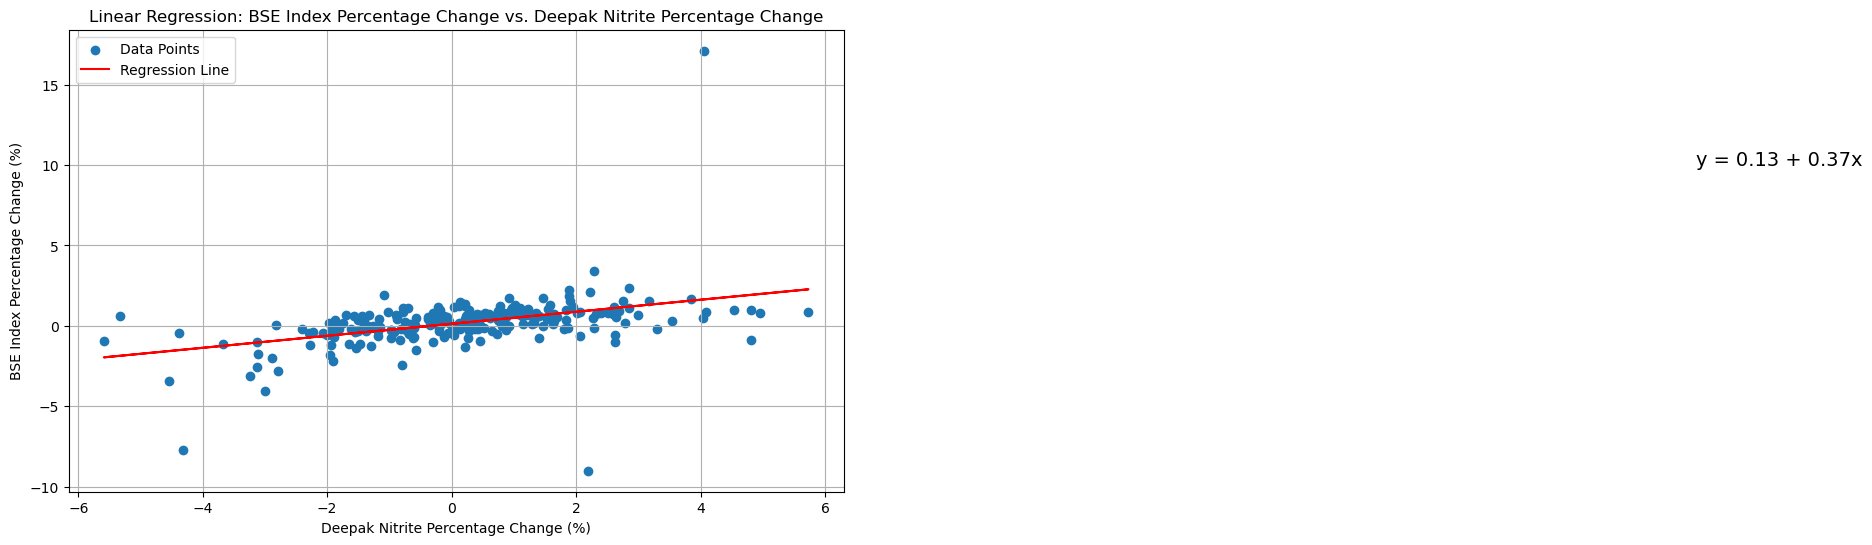

r_sqd =  0.172
p_value =  0.0


In [93]:

# Drop rows with NaN values
combined_data = combined_data.dropna()

# Check for outliers
print(round(combined_data.describe()),2)

# Optionally filter the data for better visualization
# combined_data = combined_data[(combined_data['Deepak_Nitrite_Percentage_Change'] >= -20) &
#                                (combined_data['Deepak_Nitrite_Percentage_Change'] <= 20)]

# Allocate the dependent and explanatory variables
x = combined_data['Deepak_Nitrite_Percentage_Change']  # Independent variable (Deepak Nitrite)
y = combined_data['BSE_Percentage_Change']              # Dependent variable (BSE Index)

# Check for constant data
if x.nunique() <= 1 or y.nunique() <= 1:
    print("Warning: One of the variables has constant values")
else:
    # Undertake a simple linear regression
    stats = linregress(x, y)

    # Access the regression slope and intercept
    m = stats.slope
    b = stats.intercept

    # Display slope and intercept
    print('Slope =', round(m, 3))
    print('Intercept =', round(b, 3))

    # Visualize the regression line with scatter plot
    plt.figure(figsize=(10, 6))  # Adjust figure size
    plt.scatter(x, y, label='Data Points')
    plt.plot(x, m * x + b, color='red', label='Regression Line')
    plt.title('Linear Regression: BSE Index Percentage Change vs. Deepak Nitrite Percentage Change')
    plt.xlabel('Deepak Nitrite Percentage Change (%)')  # X-axis is now Deepak Nitrite
    plt.ylabel('BSE Index Percentage Change (%)')        # Y-axis is now BSE Index
    plt.legend()
    plt.grid(True)

    # Add fitted regression equation to plot at a reasonable position
    plt.text(20, 10, 'y = {:.2f} + {:.2f}x'.format(b, m), size=14)

    plt.show()

# Fit diagnostics
r_value = stats.rvalue
p_value = stats.pvalue
print('r_sqd = ', round(r_value**2, 3))
print('p_value = ', round(p_value, 6))


The above output reveals a significant, positive relationship between percentage changes in Deepak Nitrite’s stock and the BSE Index. The equation y=0.13+0.37x, a 1% increase in Deepak Nitrite’s percentage change is associated with a 0.37% rise in the BSE Index. dditionally, a beta of 0.374 implies Deepak Nitrite is less volatile than the BSE Index, indicating a relatively lower risk. The intercept of 0.13% shows that even with no change in Deepak Nitrite, the BSE Index may still experience slight gains. 

With an R-squared of 0.172, only 17.2% of the BSE Index’s variability is explained by Deepak Nitrite’s changes, underscoring that other factors significantly impact the index.  The R-squared value reveals that while there is some explanatory power in the model, much of the variability in the BSE Index remains unexplained, signifying that other factors could also play a critical role in influencing its movements. 

The p-value of 0.0 states that it is statistically significant, meaning Deepak Nitrite’s movements are somewhat aligned with broader market trends but are not the primary driver, this finding allows us to reject the null hypothesis.

Chi-squared statistic: 26.31
P-value: 0.0
There is a significant relationship between Deepak Nitret and the BSE index movements.
Pearson correlation coefficient: 0.415


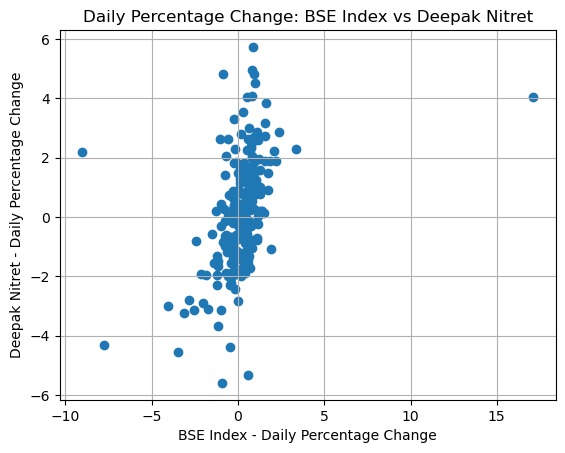

In [97]:
#chi-square

# Merge the two datasets on the 'Date' column to align the dates
merged_data = pd.merge(B[['Date', 'Percentage_Change_BSE']], D[['Date', 'Percentage_Change_Deepak']], on='Date')

# Drop any rows with missing values due to pct_change calculation
merged_data.dropna(inplace=True)

# Binary classification: 1 for increase (positive change), 0 for decrease/no change
merged_data['bse_up'] = np.where(merged_data['Percentage_Change_BSE'] > 0, 1, 0)
merged_data['deepak_up'] = np.where(merged_data['Percentage_Change_Deepak'] > 0, 1, 0)

# Perform the chi-squared test
contingency_table = pd.crosstab(merged_data['bse_up'], merged_data['deepak_up'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the rounded chi-squared test results
print(f"Chi-squared statistic: {round(chi2, 2)}")
print(f"P-value: {round(p, 6)}")

# Interpretation
alpha = 0.05
if p <= alpha:
    print("There is a significant relationship between Deepak Nitret and the BSE index movements.")
else:
    print("There is no significant relationship between Deepak Nitret and the BSE index movements.")

# Pearson Correlation Analysis
correlation = merged_data['Percentage_Change_Deepak'].corr(merged_data['Percentage_Change_BSE'])
print(f"Pearson correlation coefficient: {correlation:.3f}")

# Scatter plot for visualization of the correlation
plt.scatter(merged_data['Percentage_Change_BSE'], merged_data['Percentage_Change_Deepak'], label='Data Points')
plt.title('Daily Percentage Change: BSE Index vs Deepak Nitret')
plt.xlabel('BSE Index - Daily Percentage Change')
plt.ylabel('Deepak Nitret - Daily Percentage Change')
plt.grid(True)
plt.show()


The Chi-squared test evaluates the direction of movement (up or down) of the BSE Index and Deepak Nitrite stock.  Chi-squared statistic of 26.31 suggest a strong relationship between the movements of these two entities. This is further supported by an extremely low p-value of 0.0, indicating that the observed relationship is unlikely to be due to chance. Thus, we can confidently reject the null hypothesis, concluding that Deepak Nitrite's daily movements are significantly associated with the BSE Index.

The results indicate that Deepak Nitrite generally moves in the same direction as the BSE Index. However, the moderate Pearson correlation of 0.415 implies that while market trends affect Deepak Nitrite, other factors also play a role in its price movements. 

The small p-value suggests that the direction of change in Deepak Nitrite and the BSE Index are not independent, meaning they are statistically associated. This test doesn't measure the strength of the relationship in terms of how closely their percentage changes track together.

In [53]:
#dropping NA
B.dropna(subset=['Percentage_Change_BSE'], inplace=True)
D.dropna(subset=['Percentage_Change_Deepak'], inplace=True)

# Assuming we want to test if Deepak Nitrite's average percentage change is significantly different from a hypothesized value
# For example, let's say we hypothesize that the average percentage change is 0% (no change)
hypothesized_value = 0.0 

# Extract the percentage change data for Deepak Nitrite
deepak_changes = D['Percentage_Change_Deepak'].to_numpy()

# Perform the One Sample T-Test
t_statistic, p_value = ttest_1samp(deepak_changes, hypothesized_value)

# Print the results
print('t_statistic :', round(t_statistic, 4))
print('p_value :', round(p_value, 4))

# Interpret the results
alpha = 0.05
if p_value <= alpha:
    print(round(p_value, 4), '<', 'alpha = ', alpha, ': We reject the null hypothesis H0.')
else:
    print(round(p_value, 4), '>', 'alpha = ', alpha, ' : We do not reject the null hypothesis H0.')


t_statistic : 1.2561
p_value : 0.2103
0.2103 > alpha =  0.05  : We do not reject the null hypothesis H0.


The p-value (0.2103) is greater than the alpha level (0.05), we do not reject the null hypothesis (H0). This means that the data does not provide strong enough evidence to conclude that Deepak Nitrite's average percentage change in returns is significantly different from 0%. In practical terms, this suggests that Deepak Nitrite's stock does not have a statistically significant tendency to increase or decrease, indicating a lack of substantial movement in its average price during the observed period.

The performance of Deepak Nitrite's stock is relatively stable or has not deviated significantly from a state of no change over the period analyzed. Investors or analysts might consider this information when making investment decisions, as it suggests a cautious approach to expectations of stock performance. However, it's essential to consider additional factors and analysis before making conclusions about the stock's potential.

In [62]:
yhat1 = b + m * 7
yhat2 = b + m * 0.5
yhat3 = b + m * -7

print('Expected Return of BSE Index =', round(yhat1,3), "%")
print('Expected Return of BSE Index =', round(yhat2,3), "%")
print('Expected Return of BSE Index =', round(yhat3,3), "%")

Expected Return of BSE Index = 2.742 %
Expected Return of BSE Index = 0.313 %
Expected Return of BSE Index = -2.49 %


Trying to predict the value of the BSE index returns based on Deepak Nitret returns.